In [1]:
import pickle
from matplotlib import pyplot as plt
import os
from itertools import chain


In [2]:
plt.rcParams.update({'font.size': 22})
legend_font_size = 15

In [3]:
def get_variant_name(variant):
    if variant == 'default':
        return 'B-QLSTM'
    if variant == 'v2':
        return 'L-QLSTM'
    if variant == 'reupload':
        return 'R-QLSTM'

def parse_filename(filename):
    # Example: qlstm.q8.lr0.005.vL-QLSTM.l3.pkl
    parts = filename.split('.')
    model = parts[0]
    lr = None
    layers = None
    variant = None
    qubits = None
    for i, p in enumerate(parts):
        if p.startswith('lr'):
            lr = p[2:] + '.' + parts[i+1]
        if p.startswith('l') and p[1:].isdigit():
            layers = int(p[1:])
        if p.startswith('v'):
            variant = get_variant_name(p[1:])
        if p.startswith('q') and not p == 'qlstm':
            qubits = int(p[1:])
    return model, variant, layers, lr, qubits


Loading qlstm.q10.lr0.001.vdefault.l2.pkl...
Loading qlstm.q10.lr0.001.vdefault.l3.pkl...
Loading qlstm.q10.lr0.002.vdefault.l3.pkl...
Loading qlstm.q10.lr0.005.vdefault.l3.pkl...
Loading qlstm.q10.lr0.005.vreupload.l3.pkl...
Loading qlstm.q10.lr0.005.vreupload.l4.pkl...
Loading qlstm.q10.lr0.005.vv2.l3.pkl...
Loading qlstm.q10.lr0.01.vdefault.l3.pkl...
Loading qlstm.q10.lr0.01.vreupload.l3.pkl...
Loading qlstm.q10.lr0.01.vreupload.l4.pkl...
Loading qlstm.q10.lr0.01.vv2.l3.pkl...
Loading qlstm.q10.lr0.02.vdefault.l3.pkl...
Loading qlstm.q10.lr0.05.vdefault.l3.pkl...
Loading qlstm.q10.lr0.1.vdefault.l3.pkl...
Loading qlstm.q11.lr0.001.vdefault.l2.pkl...
Loading qlstm.q12.lr0.01.vreupload.l3.pkl...
Loading qlstm.q12.lr0.01.vreupload.l4.pkl...
Loading qlstm.q8.lr0.005.vdefault.l3.pkl...
Loading qlstm.q8.lr0.005.vv2.l3.pkl...
Loading qlstm.q8.lr0.005.vv2.l4.pkl...
Loading qlstm.q8.lr0.005.vreupload.l4.pkl...
1.9804135000863463
1.9358041081713127
1.6286143147754086
1.538020689893198
1.6220

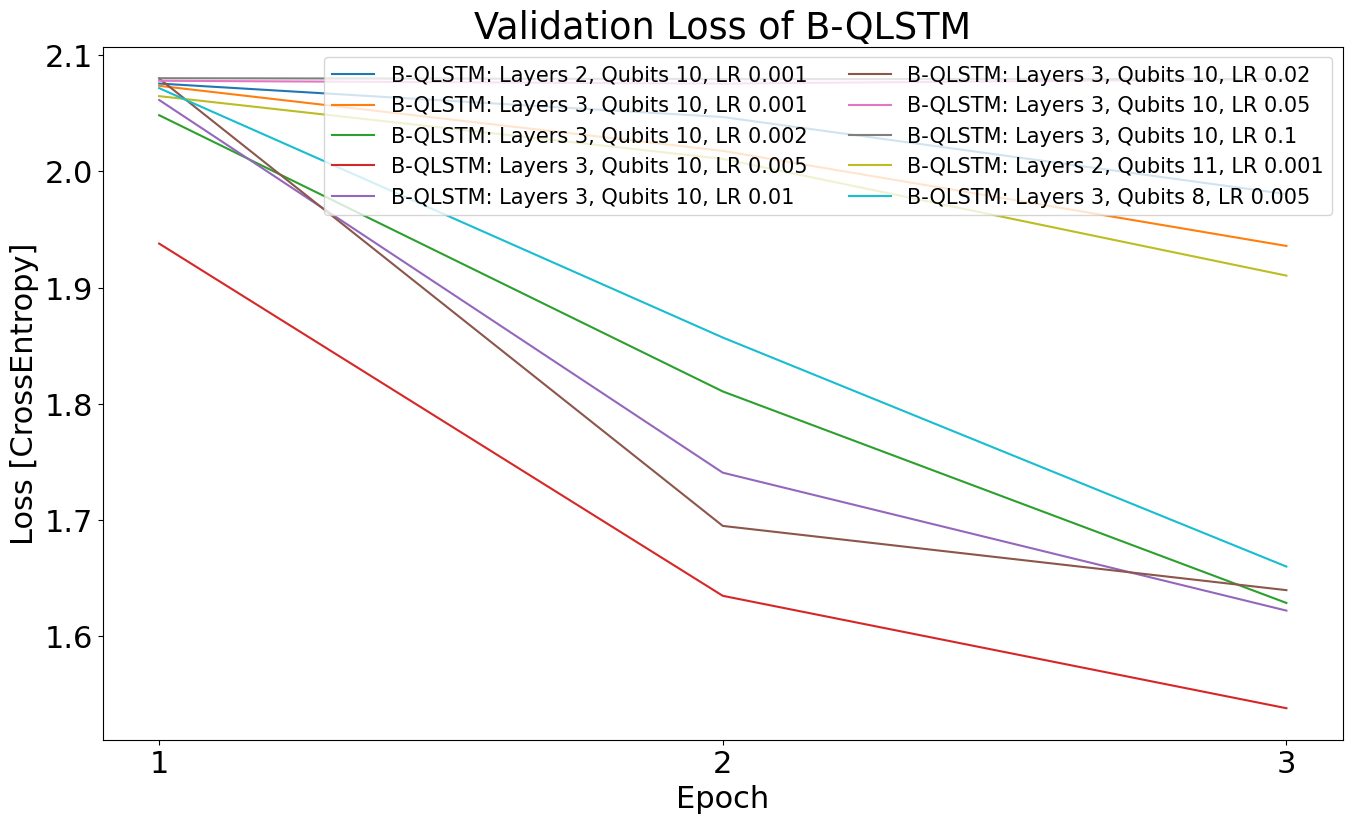

1.3089633576176076
1.2423974714569161
1.4227866406190077
1.4015201173698113


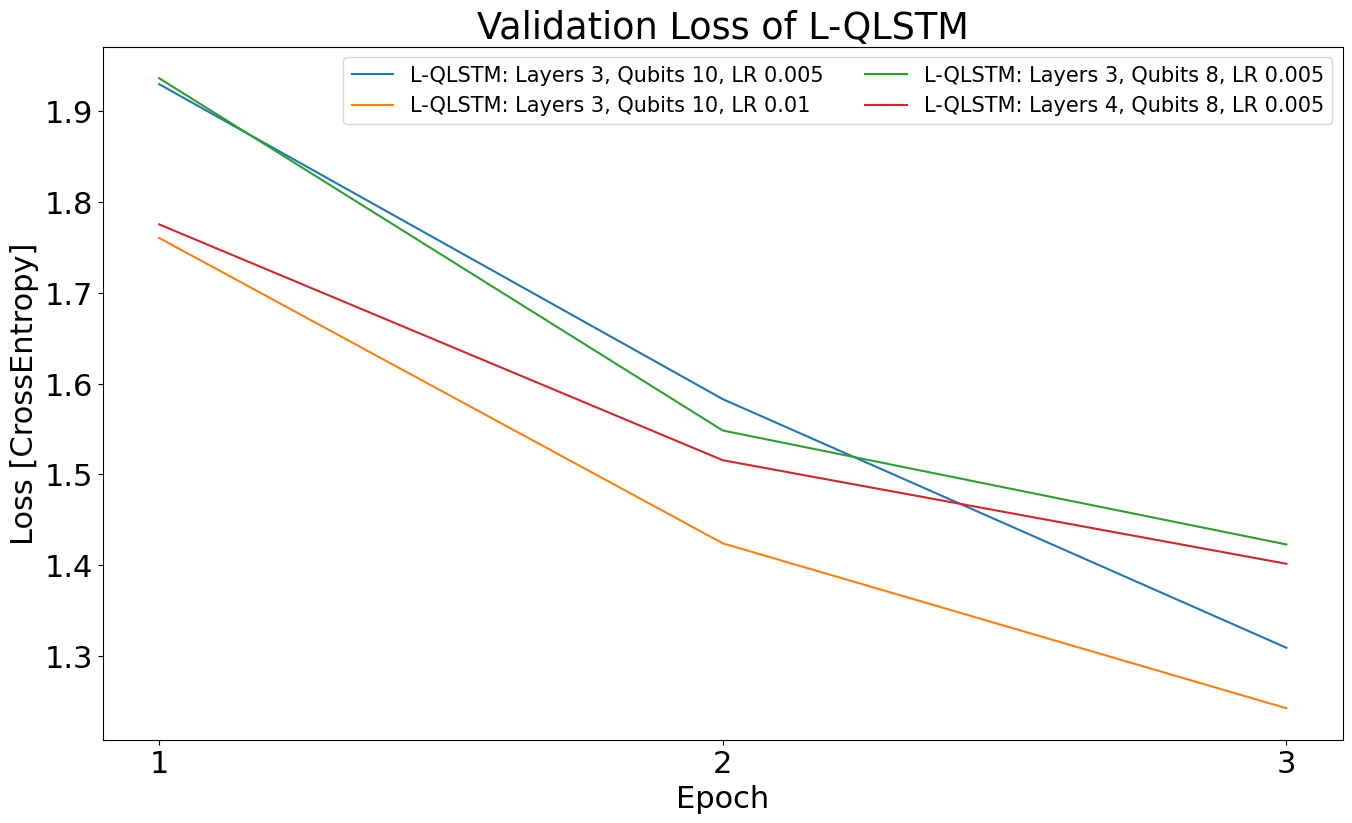

1.164380232356603
1.279187763141783
1.3288257699066521
1.1554396034018146
1.2203302418771436
1.3641178619772025
0.9612154014296682


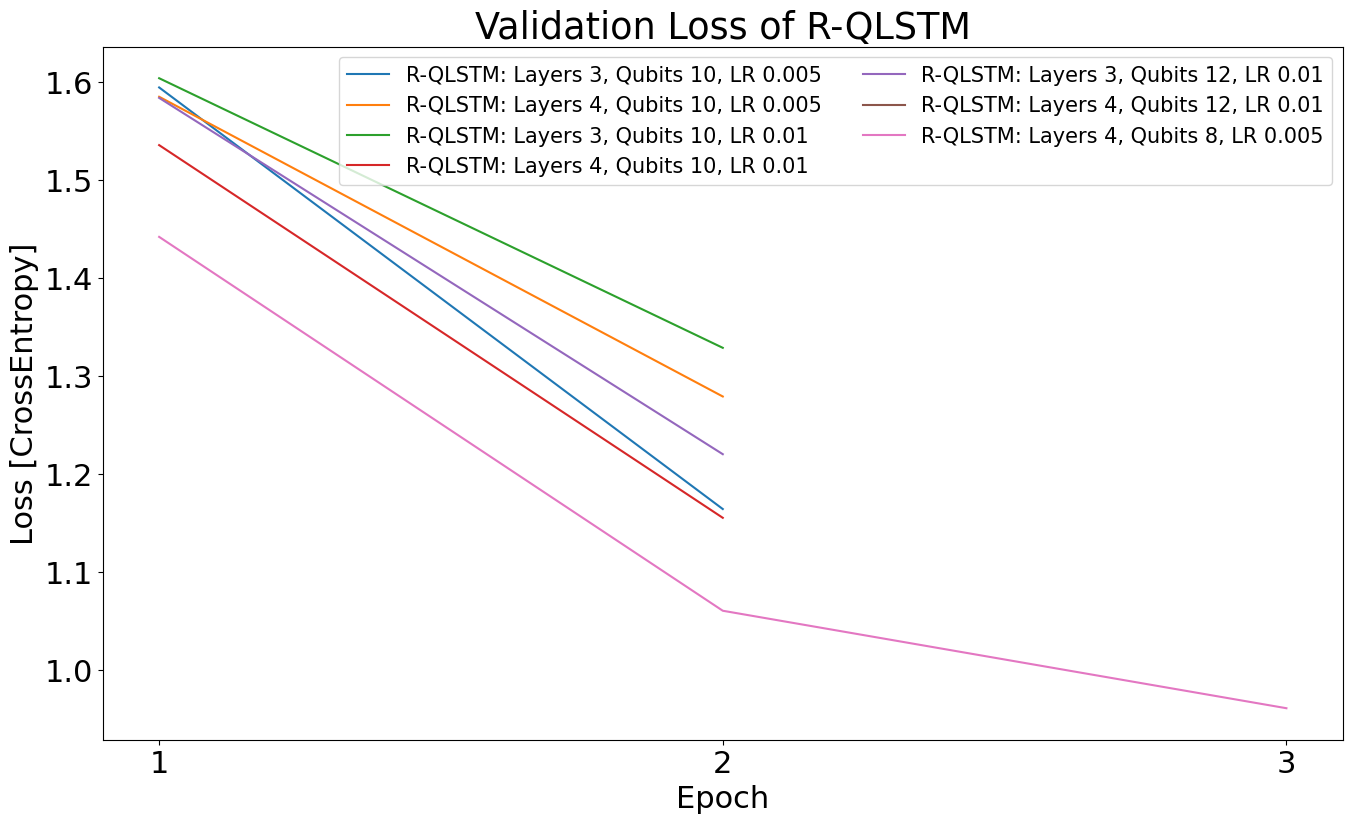

B-QLSTM: Layers 3, Qubits 10, LR 0.005 1.538020689893198
L-QLSTM: Layers 3, Qubits 10, LR 0.01 1.2423974714569161
R-QLSTM: Layers 4, Qubits 8, LR 0.005 0.9612154014296682
0.7092686295509338


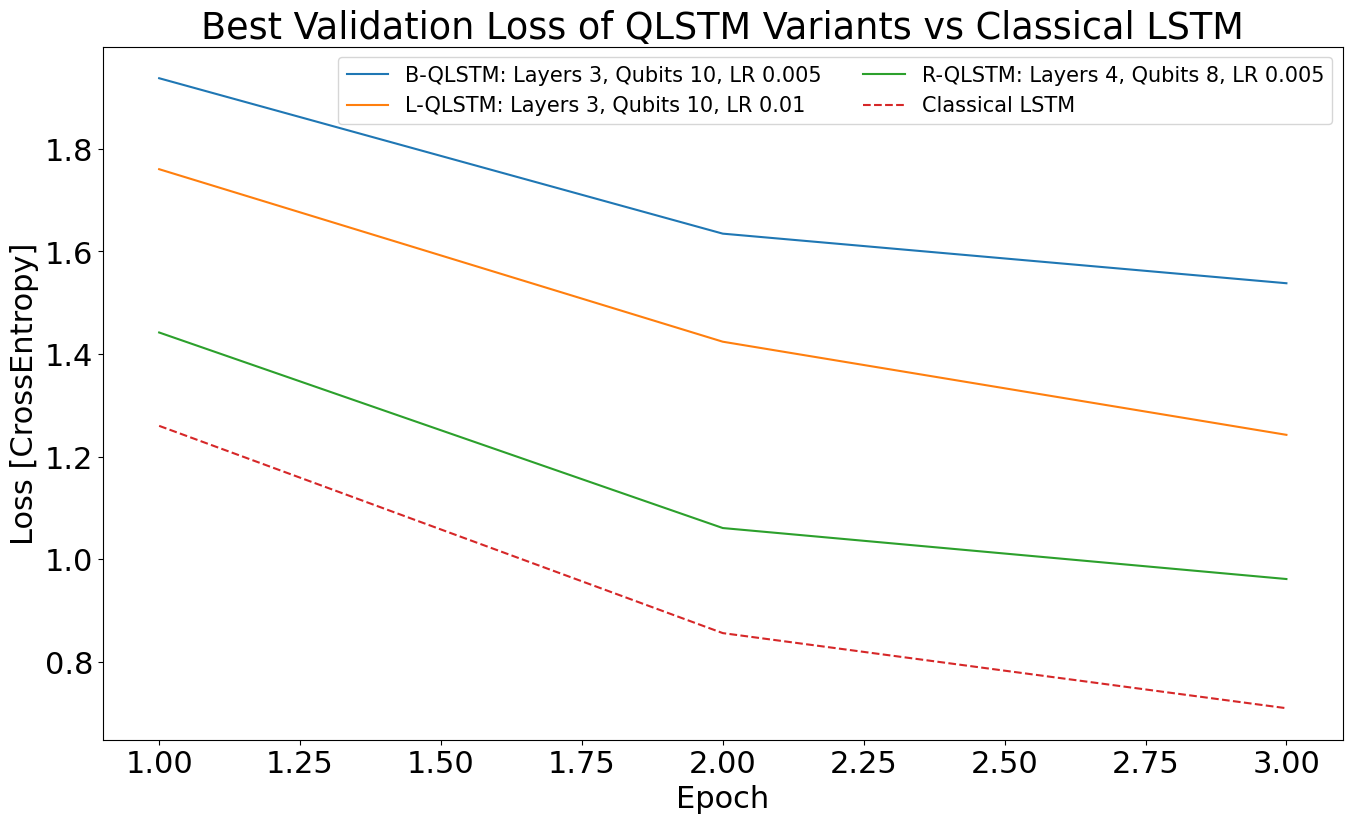

In [4]:
filenames = []

# os.walk('./fully-trained/')
plot_dict = {
    'B-QLSTM': [],
    'L-QLSTM': [],
    'R-QLSTM': []
}

classical_lstm = None
if os.path.exists('./classical_LSMT_audio.h5'):
    with open('./classical_LSMT_audio.h5', 'rb') as file:
        classical_lstm = pickle.load(file) 

for root, dirs, files in chain(os.walk('./delftblue-new/'), 
                               os.walk('./fully-trained/')):
    for filename in files:
        if filename.endswith('.pkl'):
            filenames.append(filename)
            print(f"Loading {filename}...")
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                model_dict = pickle.load(file)
                model, variant, layers, lr, qubits = parse_filename(filename)
                plot_dict[variant].append((model_dict['loss'], f"{variant}: Layers {layers}, Qubits {qubits}, LR {lr}"))
                #plt.plot(range(1, 4), model_dict['loss'][:3], label=f"{model.upper()} {variant}: Layers {layers}, Qubits {qubits}, LR {lr}")


best_models = {
    'B-QLSTM': None,
    'L-QLSTM': None,
    'R-QLSTM': None
}
for variant, data in plot_dict.items():
    plt.figure(figsize=(16, 9))
    plt.title(f"Validation Loss of {variant}")
    best_models[variant] = min(data, key=lambda x: min(x[0][:3]))
    for loss, label in data:
        number_of_items = min(len(loss), 3)
        print(loss[number_of_items - 1])
        plt.plot(range(1, number_of_items + 1), loss[:number_of_items], label=label)
        

    plt.legend(fontsize=legend_font_size, loc='upper right', ncol=2)
    plt.xlabel('Epoch')
    plt.xticks(range(1, 4))
    plt.ylabel('Loss [CrossEntropy]')
    plt.show()

# Graph all best models and compare with classical LSTM
plt.figure(figsize=(16, 9))
plt.title("Best Validation Loss of QLSTM Variants vs Classical LSTM")
for variant, (loss, label) in best_models.items():
    number_of_items = min(len(loss), 3)
    print(label, loss[number_of_items - 1])
    plt.plot(range(1,number_of_items + 1), loss[:number_of_items], label=label)

if classical_lstm:
    plt.plot(range(1, 3 + 1), classical_lstm['loss'][:3], label='Classical LSTM', linestyle='--')
    print(classical_lstm['loss'][2])
plt.legend(fontsize=legend_font_size, loc='upper right', ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')
plt.show()


Loading qlstm.q10.lr0.005.vreupload.l3.pkl...
Loading qlstm.q12.lr0.005.vreupload.l3.pkl...
Loading qlstm.q10.lr0.001.vdefault.l2.pkl...
Loading qlstm.q10.lr0.001.vdefault.l3.pkl...
Loading qlstm.q10.lr0.002.vdefault.l3.pkl...
Loading qlstm.q10.lr0.005.vdefault.l3.pkl...
Loading qlstm.q10.lr0.01.vdefault.l3.pkl...
Loading qlstm.q10.lr0.02.vdefault.l3.pkl...
Loading qlstm.q10.lr0.05.vdefault.l3.pkl...
Loading qlstm.q10.lr0.1.vdefault.l3.pkl...
Loading qlstm.q11.lr0.001.vdefault.l2.pkl...
Loading qlstm.q8.lr0.005.vdefault.l3.pkl...
Loading qlstm.q8.lr0.005.vreupload.l3.pkl...
Loading qlstm.q8.lr0.005.vv2.l3.pkl...
Loading qlstm.q10.lr0.001.vdefault.l2.pkl...
Loading qlstm.q10.lr0.001.vdefault.l3.pkl...
Loading qlstm.q10.lr0.002.vdefault.l3.pkl...
Loading qlstm.q10.lr0.005.vdefault.l3.pkl...
Loading qlstm.q10.lr0.005.vreupload.l3.pkl...
Loading qlstm.q10.lr0.005.vreupload.l4.pkl...
Loading qlstm.q10.lr0.005.vv2.l3.pkl...
Loading qlstm.q10.lr0.01.vdefault.l3.pkl...
Loading qlstm.q10.lr0.01

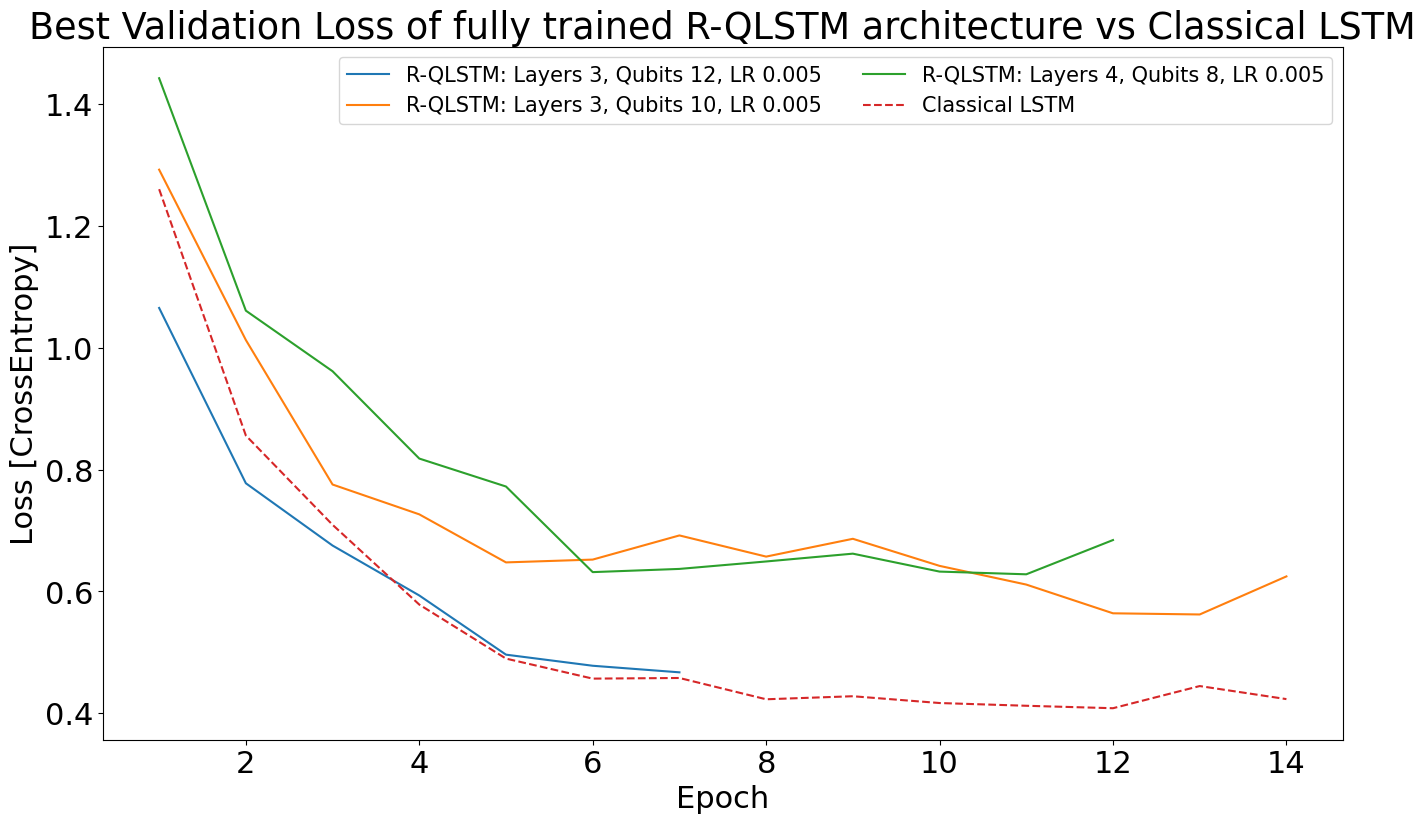

In [5]:
from collections import OrderedDict
from functools import reduce


filenames = []

# os.walk('./fully-trained/')
plot_dict = {
    'B-QLSTM': [],
    'L-QLSTM': [],
    'R-QLSTM': []
}

classical_lstm = None
if os.path.exists('./classical_LSMT_audio.h5'):
    with open('./classical_LSMT_audio.h5', 'rb') as file:
        classical_lstm = pickle.load(file) 

for root, dirs, files in os.walk('./'):
    for filename in files:
        if filename.endswith('.pkl') and not filename.startswith('test'):
            filenames.append(filename)
            print(f"Loading {filename}...")
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                model_dict = pickle.load(file)
                model, variant, layers, lr, qubits = parse_filename(filename)
                plot_dict[variant].append((model_dict['loss'], f"{variant}: Layers {layers}, Qubits {qubits}, LR {lr}"))
                #plt.plot(range(1, 4), model_dict['loss'][:3], label=f"{model.upper()} {variant}: Layers {layers}, Qubits {qubits}, LR {lr}")


best_models = []
for variant, data in plot_dict.items():
    best_models += data
print(len(best_models), "models found")
best_models.sort(key=lambda x: min(x[0]))
print(best_models[:3])

# Plot top 3 best models
plt.figure(figsize=(16, 9))
plt.title("Best Validation Loss of fully trained R-QLSTM architecture vs Classical LSTM")
for i in range(3):    
    model = best_models[i]
    print(model[0][-1], model[1])
    plt.plot(range(1, len(model[0]) + 1), model[0], label=model[1])
        
if classical_lstm:
    plt.plot(range(1, len(classical_lstm['loss']) + 1), classical_lstm['loss'], label='Classical LSTM', linestyle='--')
plt.legend(fontsize=legend_font_size, loc='upper right', ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')
plt.show()




In [6]:
from q_lstm_tf_v2 import QLSTM
from q_lstm_tf_v2_data_reuploaded import QLSTM as QLSTM_reupload
from q_lstm_tf import QLSTM as QLSTM_default
import pennylane as qml
import tensorflow as tf

Using Quantum Device: <lightning.qubit device (wires=2) at 0x19e8a7bcf10>


(<Figure size 1100x400 with 1 Axes>, <Axes: >)

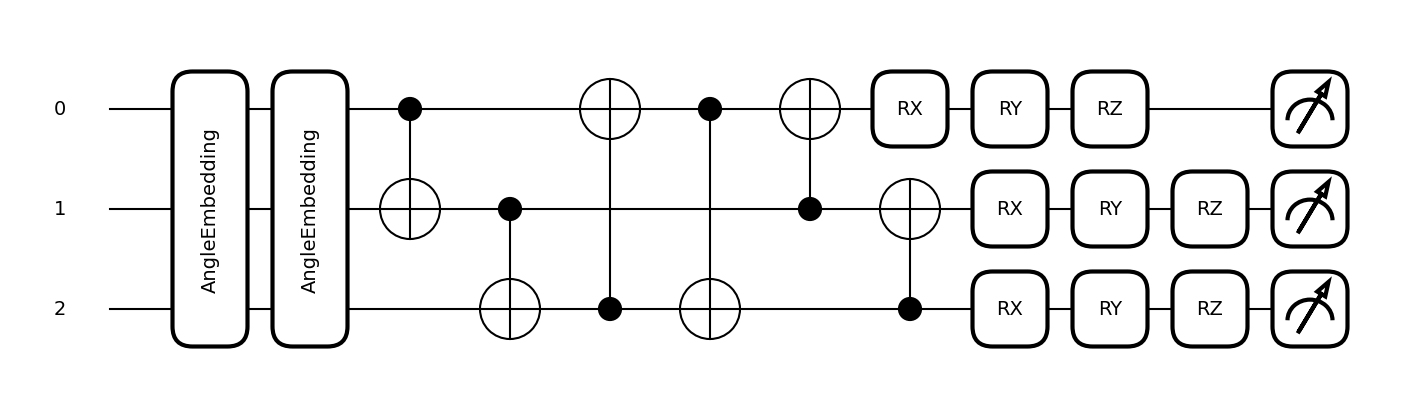

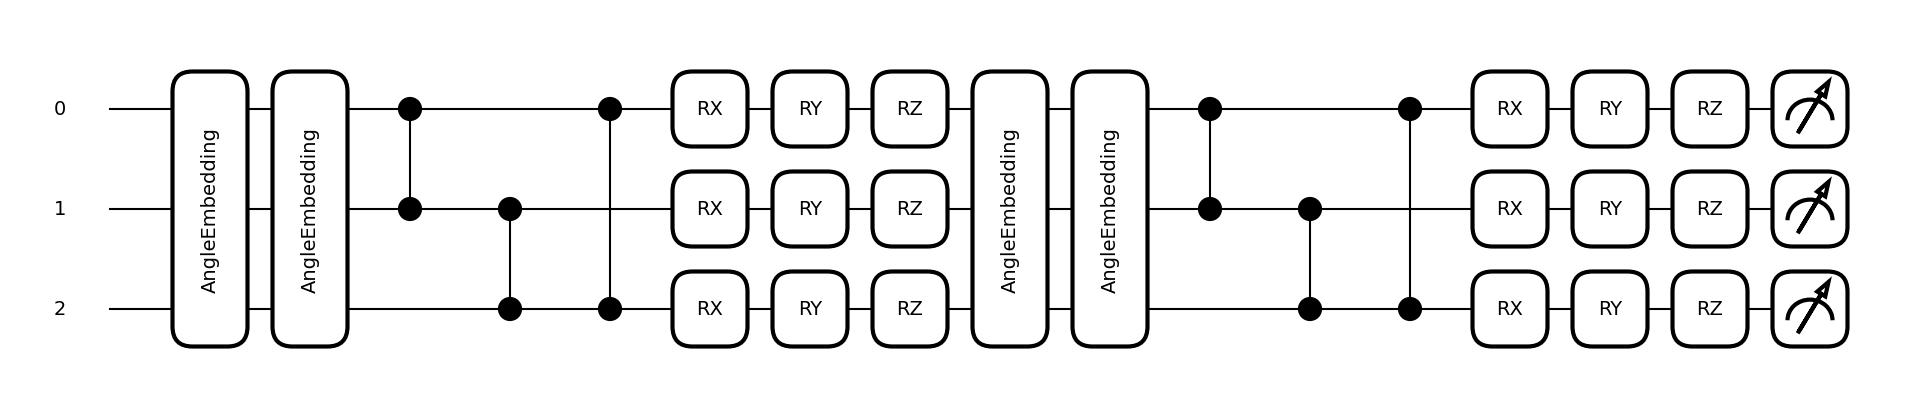

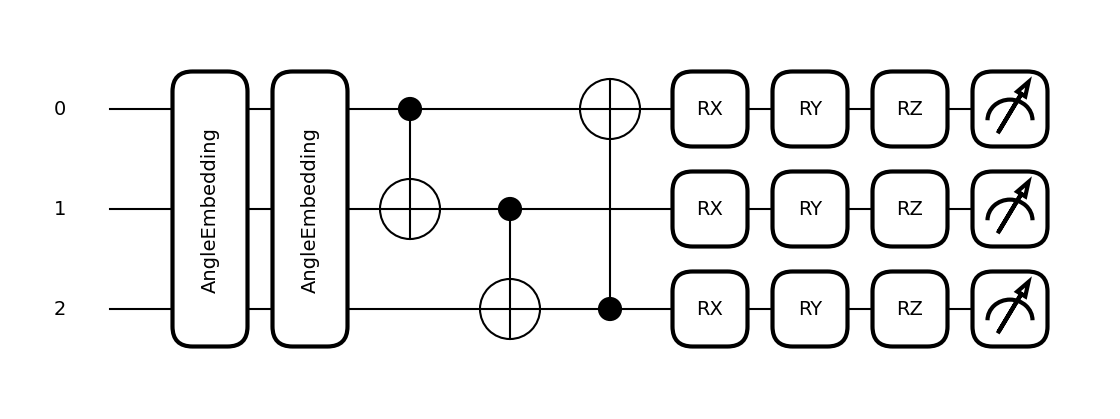

In [7]:
qlstm = QLSTM(1, layers=1)
qml.draw_mpl(qlstm.circuit)(tf.random.uniform((1, qlstm.wires)), tf.random.uniform(qlstm.shapes['weights']))

qlstm_reupload = QLSTM_reupload(1, layers=2)
qml.draw_mpl(qlstm_reupload.circuit)(tf.random.uniform((1, 2*qlstm_reupload.wires)), tf.random.uniform(qlstm_reupload.shapes['weights']))

qlstm_default = QLSTM_default(1, layers=1)
qml.draw_mpl(qlstm_default.circuit)(tf.random.uniform((1, qlstm_default.wires)), tf.random.uniform(qlstm_default.shapes['weights']))

# Visuals for Testing QLSTMs

In [8]:
# Load saved sin models
filenames = []

for root, dirs, files in os.walk('./testing'):
    for filename in files:
        if filename.endswith('.h5') and not 'basel' in filename:
            filenames.append(filename)
            print(f"Loading {filename} ...")
            file_path = os.path.join(root, filename)


Loading classical_lstm_sin.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.0001.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.001.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.01.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.0001.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.001.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.01.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.0001.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.001.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.01.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.0001.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.001.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.01.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.0001.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.001.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.01.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_3_lr_0.0001.h5 ...
Loading model_qlstm_reupload_qubits_3_

0.2702098892808125
0.5742982335327781
0.6154395422185346


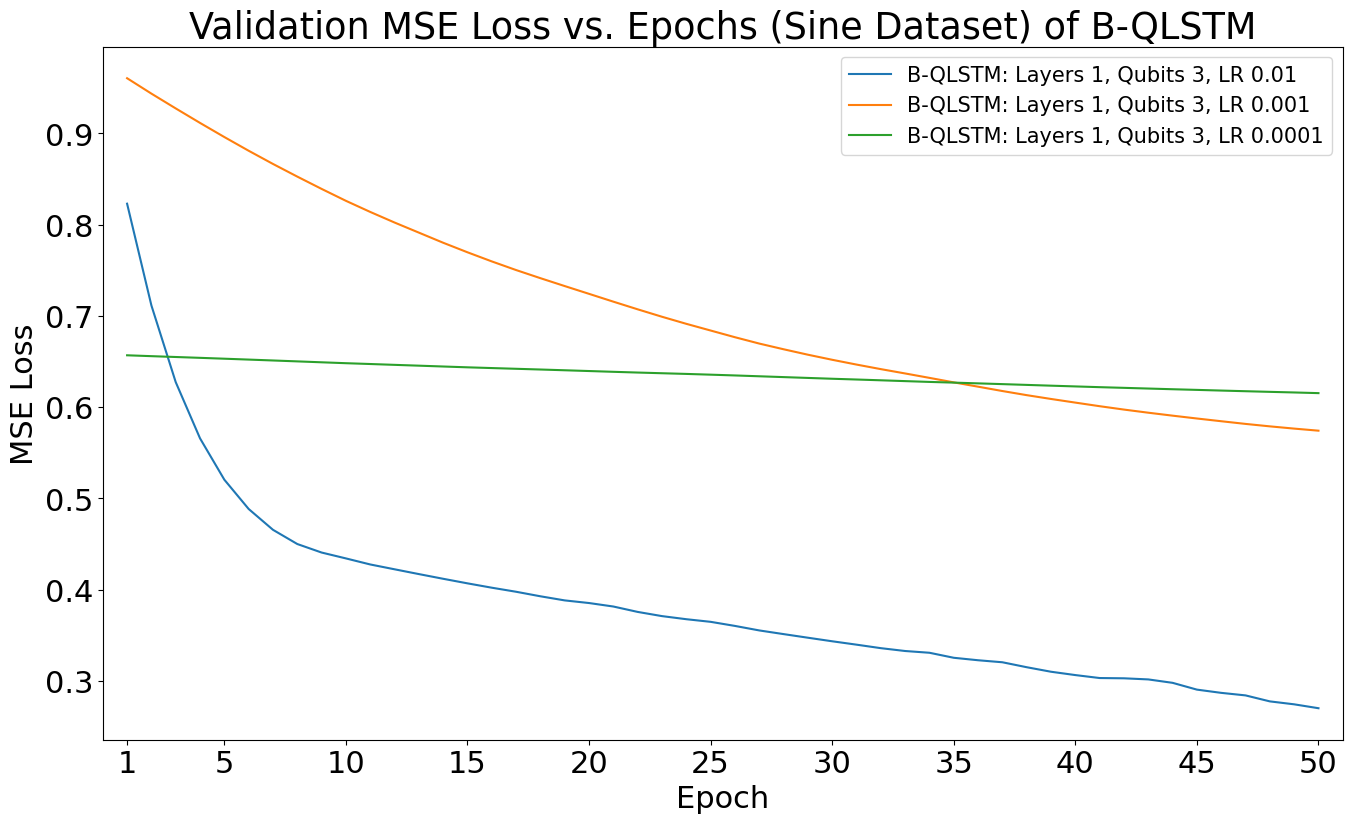

0.01 0.053685810602256606
0.001 0.4959709562976625
0.0001 0.9930437332032167


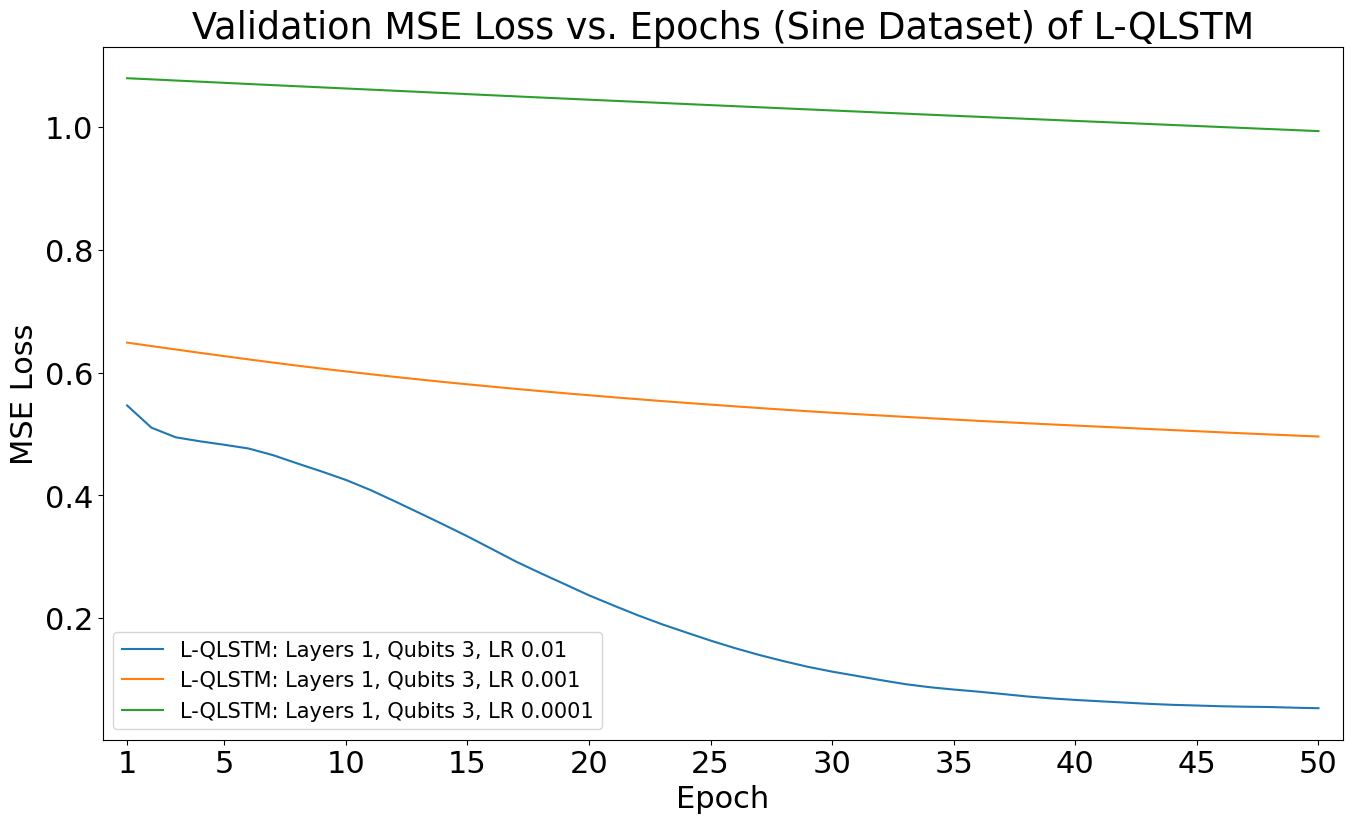

0.045454112444975346
0.045454112444975346
0.045454112444975346
0.033655296954383275
0.033655296954383275
0.033655296954383275
0.014229130558711969
0.014229130558711969
0.014229130558711969


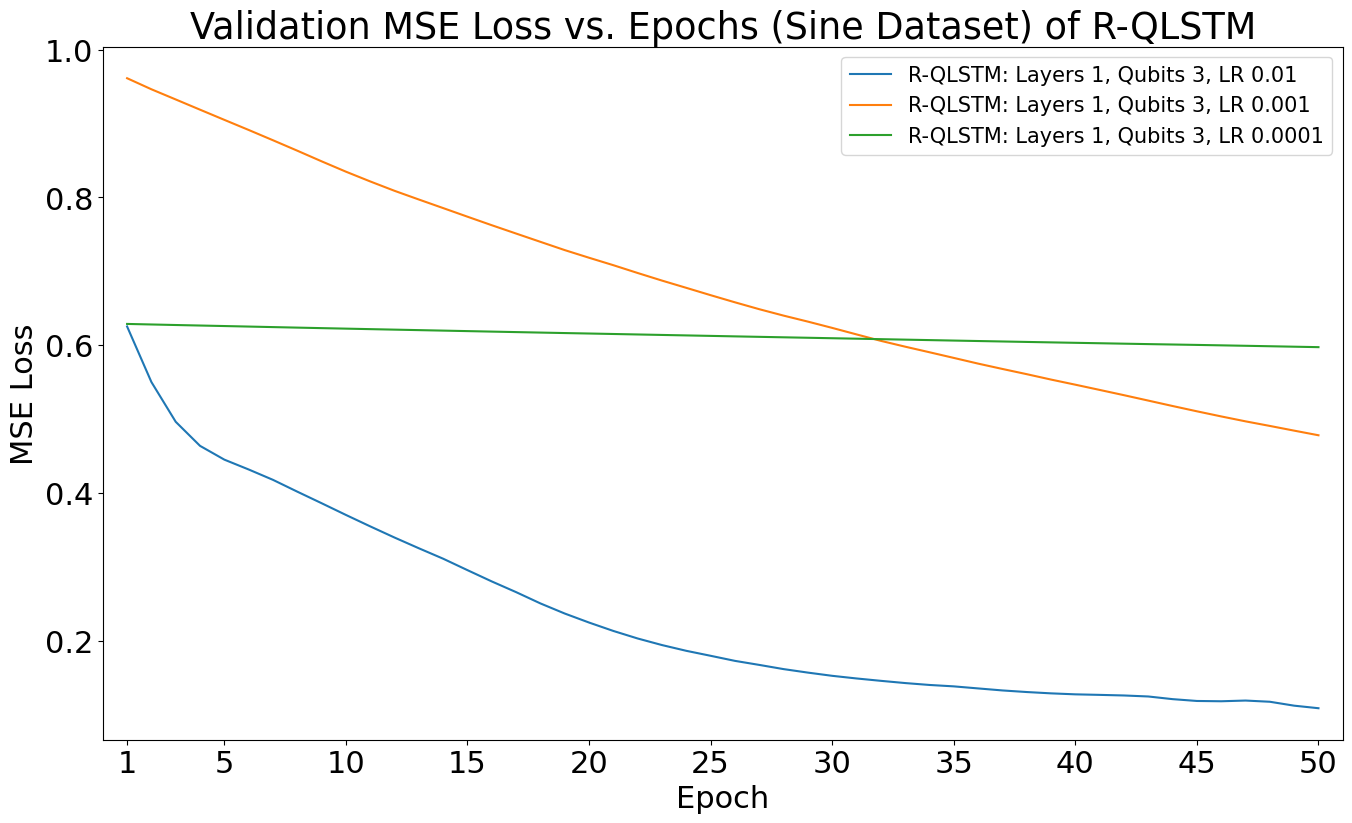

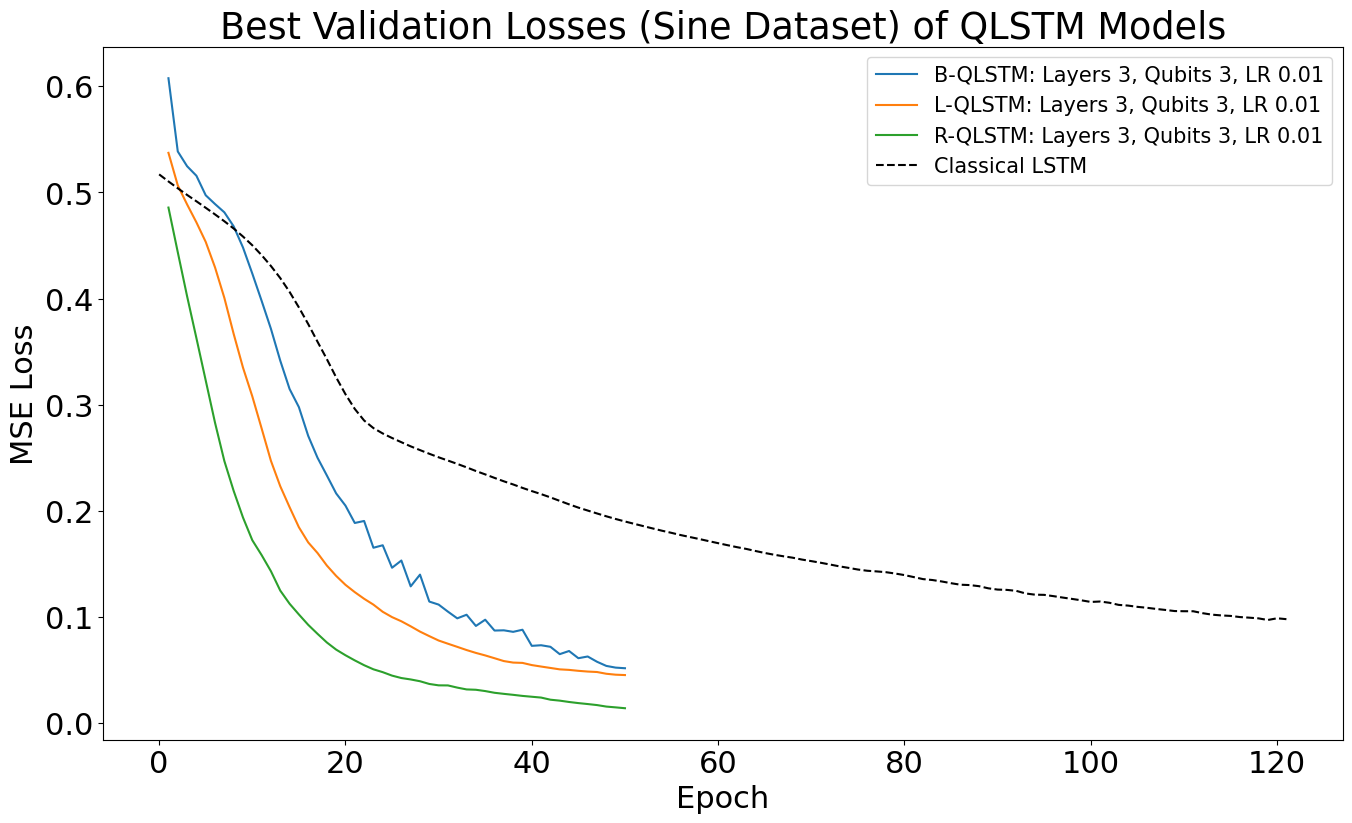

Best Loss for B-QLSTM: 0.05189005690889584
Best Loss for L-QLSTM: 0.045454112444975346
Best Loss for R-QLSTM: 0.014229130558711969
Best Loss for LSTM: 0.0973155293735848


In [9]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# def parse_filename(filename):
#     # Example: qlstm.q8.lr0.005.vL-QLSTM.l3.pkl
#     parts = filename.split('.')
#     model = parts[0]
#     lr = None
#     layers = None
#     variant = None
#     for i, p in enumerate(parts):
#         if p.startswith('lr'):
#             lr = p[2:] + '.' + parts[i+1]
#         if p.startswith('l') and p[1:].isdigit():
#             layers = int(p[1:])
#         if p.startswith('v'):
#             variant = 'B-QLSTM' if p[0] == 'default' else p[0]
#     return model, variant, layers, lr
def parse_filename(filename):
    # Example: qlstm.q8.lr0.005.vL-QLSTM.l3.pkl
    parts = filename.split('_')
    lr = None
    layers = None
    variant = 'B-QLSTM' if parts[2] == 'qubits' else get_variant_name(parts[2])
    for i, p in enumerate(parts):
        if p.startswith('lr'):
            lr = float(parts[i+1][:-3])
        if p.startswith('layers'):
            layers = int(parts[i+1])
        if p.startswith('qubits'):
            qubits = int(parts[i+1])
    return variant, layers, lr, qubits

# Organize results by experiment, model, variant, layers, lr
results = {}
classical_dict = {}
for fname in filenames:
    file_path = os.path.join(root, fname)
    with open(file_path, 'rb') as file:
        model_dict = pickle.load(file)
    if 'classical' in fname:
        classical_dict[fname.split('.')[0].split('_')[-1]] = model_dict
        continue
    variant, layers, lr, qubits = parse_filename(fname)
    key = ('QLSTM', variant)
    if key not in results:
        results[key] = []
    val_loss, val_accuracy, best_loss = model_dict['loss'], model_dict['accuracy'], model_dict['best_loss']
    results[key].append({
        'layers': layers,
        'lr': lr,
        'val_loss': val_loss,
        'final_val_mse': best_loss,
        'qubits': qubits,
        'fname': fname
    })

# Example: Plotting for Sin Dataset (repeat for Basel if available)
# 1. Line plot of MSE loss vs. epochs for each model/variant
best_losses = []
curr_length = 0
for (model, variant), runs in results.items():
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        
        
        if run['qubits'] == 3 and run['layers'] == 1:
            print(min(run['val_loss'][curr_length:len(run['val_loss'])]))
            plt.plot(range(1,len(run['val_loss']) - curr_length + 1) , run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Sine Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()
    break    



for (model, variant), runs in results.items():
    if variant != 'L-QLSTM':
        continue
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        
        val_loss = run['val_loss'][curr_length:len(run['val_loss'])]

        if run['qubits'] == 3 and run['layers'] == 1:
            print(f"{run['lr']} {min(val_loss)}")
            plt.plot(range(1,len(run['val_loss']) - curr_length + 1) , val_loss, label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Sine Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()

for (model, variant), runs in results.items():
    if variant != 'R-QLSTM':
        continue
    plt.figure(figsize=(16, 9))

    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        print(min(run['val_loss']))
        if run['qubits'] == 3 and run['layers'] == 1:
            plt.plot(range(1,len(run['val_loss']) - curr_length + 1) ,run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]

    plt.title(f"Validation MSE Loss vs. Epochs (Sine Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()
    
# Plot best losses
plt.figure(figsize=(16, 9))
for model, variant, run in best_losses:
    label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
    plt.plot(range(1,len(run['val_loss'])+1), run['val_loss'], label=label)
plt.plot(classical_dict['sin']['loss'], label='Classical LSTM', linestyle='--', color='black')
plt.title(f"Best Validation Losses (Sine Dataset) of QLSTM Models")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(fontsize=legend_font_size)
plt.show()


for model, variant, run in best_losses:
    print(f"Best Loss for {variant}: {min(run['val_loss'])}")
print(f"Best Loss for LSTM: {min(classical_dict['sin']['loss'])}")

In [10]:
# Load saved sin models
more_filenames = []

for root, dirs, files in os.walk('./more-testing'):
    for filename in files:
        if filename.endswith('.h5') and not 'basel' in filename:
            more_filenames.append(filename)
            print(f"Loading {filename} ...")

more_results = {}    
for fname in more_filenames:
    file_path = os.path.join(root, fname)
    with open(file_path, 'rb') as file:
        model_dict = pickle.load(file)
    if 'classical' in fname:
        classical_dict[fname.split('.')[0].split('_')[-1]] = model_dict
        continue
    variant, layers, lr, qubits = parse_filename(fname)
    key = ('QLSTM', variant)
    if key not in more_results:
        more_results[key] = []
    val_loss, val_accuracy, best_loss = model_dict['loss'], model_dict['accuracy'], model_dict['best_loss']
    more_results[key].append({
        'layers': layers,
        'lr': lr,
        'val_loss': val_loss,
        'final_val_mse': best_loss,
        'qubits': qubits,
        'fname': fname
    })

Loading model_qlstm_qubits_3_layers_4_lr_0.01.h5 ...
Loading model_qlstm_qubits_3_layers_5_lr_0.01.h5 ...
Loading model_qlstm_qubits_3_layers_6_lr_0.01.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_4_lr_0.01.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_5_lr_0.01.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_6_lr_0.01.h5 ...
Loading model_qlstm_v2_qubits_3_layers_4_lr_0.01.h5 ...
Loading model_qlstm_v2_qubits_3_layers_5_lr_0.01.h5 ...
Loading model_qlstm_v2_qubits_3_layers_6_lr_0.01.h5 ...


1 0.2702098892808125
2 0.056233186169627906
3 0.05189005690889584
4 0.02888168144688054
5 0.021799906081047565
6 0.041390499888095365


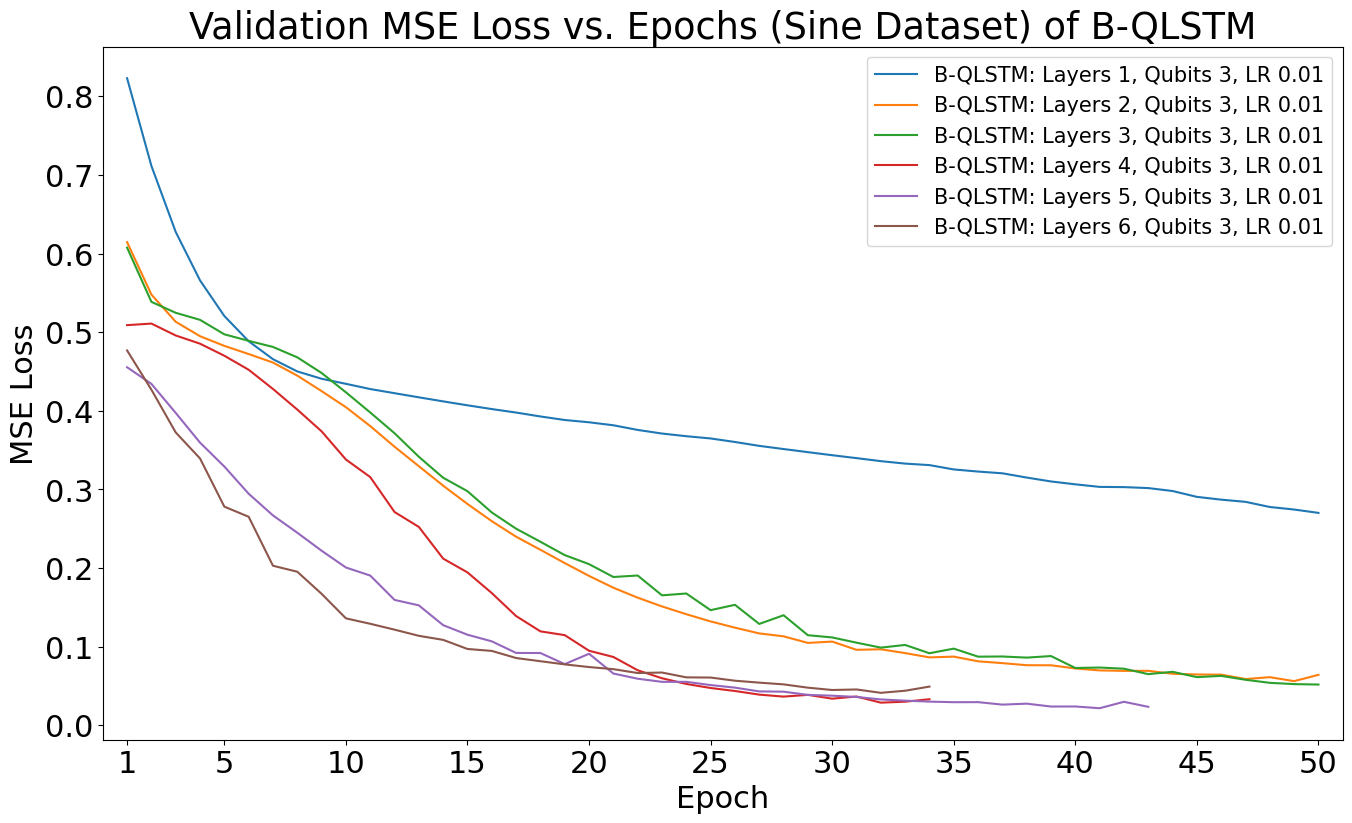

1 0.053685810602256606
2 0.04825558367410498
3 0.045454112444975346
4 0.05890493536347611
5 0.04699851815534013
6 0.04833957800003337


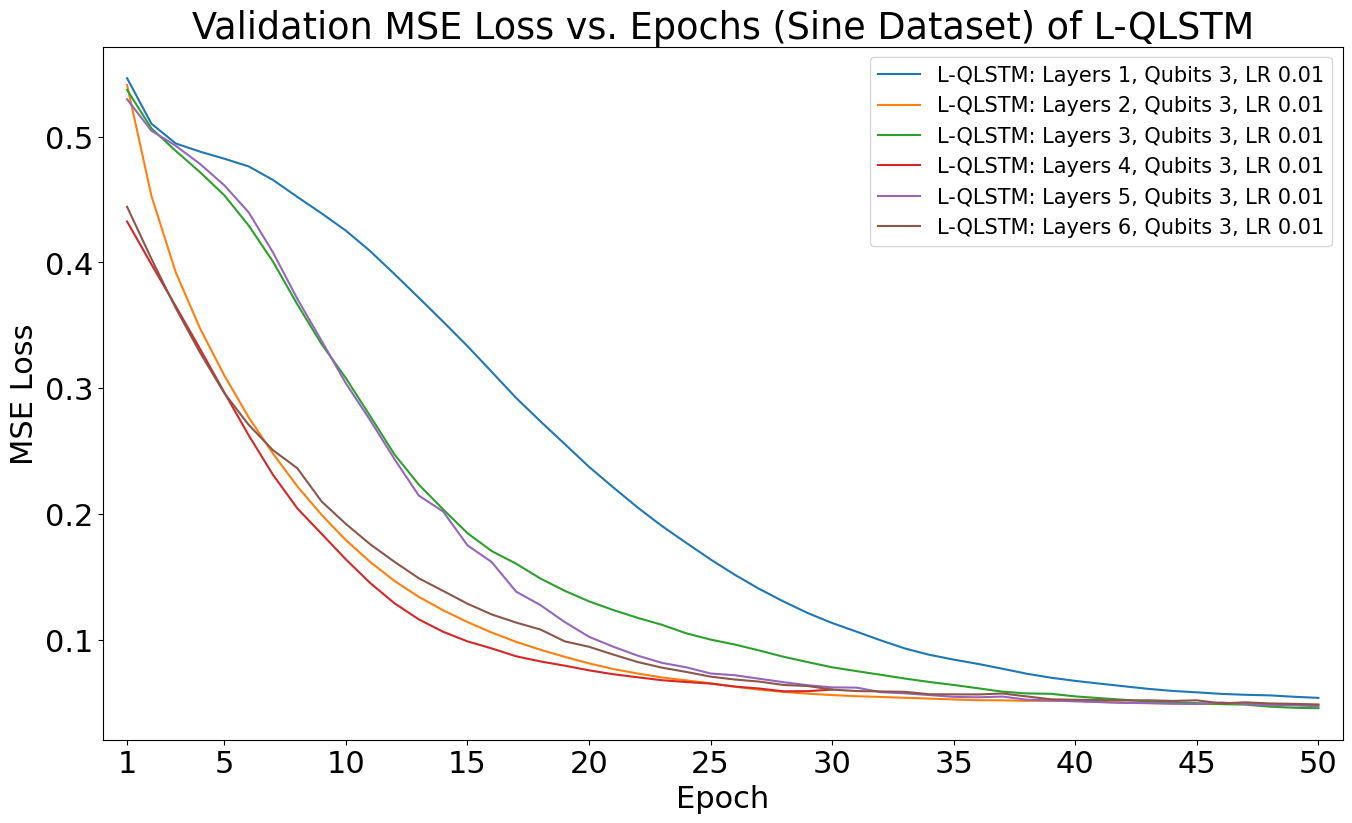

1 0.10851553272229772
2 0.033655296954383275
3 0.014229130558711969
4 0.012680195948534456
5 0.007578767055333576
6 0.022678194736968197


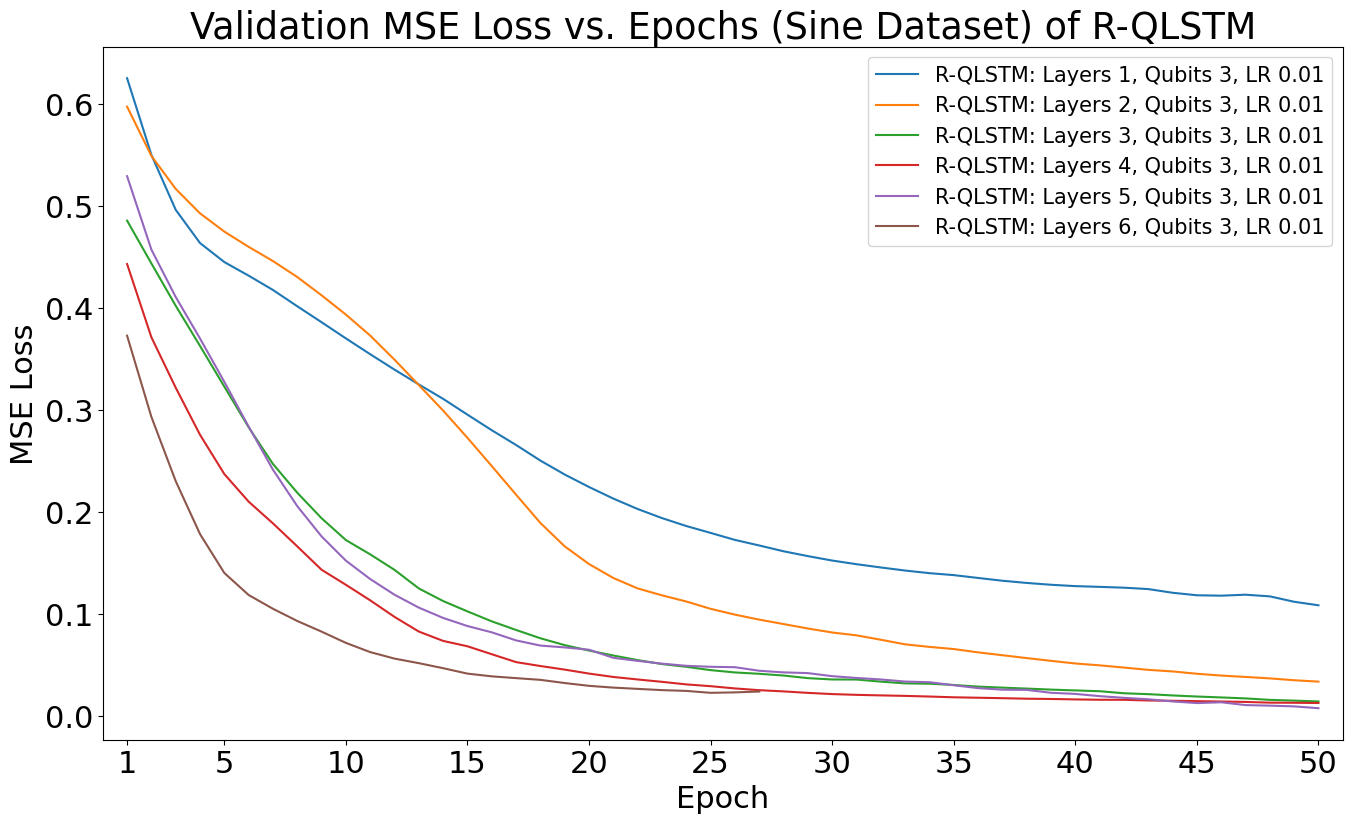

In [11]:
curr_length = 0
for (model, variant), runs in results.items():
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        
        if run['lr'] == 0.01 and run['qubits'] == 3:
            print(f"{run['layers']} {min(run['val_loss'])}")
            plt.plot(range(1,len(run['val_loss']) + 1) , run['val_loss'], label=f"{label}")
    break    

more_curr_length = 0
for (model, variant), runs in more_results.items():    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        
        val_loss = run['val_loss'][more_curr_length:len(run['val_loss'])]
        if run['lr'] == 0.01 and run['qubits'] == 3:
            print(f"{run['layers']} {min(val_loss)}")
            plt.plot(range(1,len(run['val_loss']) - more_curr_length + 1) , run['val_loss'][more_curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][more_curr_length:len(run['val_loss'])]
        more_curr_length = next_length
    plt.title(f"Validation MSE Loss vs. Epochs (Sine Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()
    break    



for (model, variant), runs in results.items():
    if variant != 'L-QLSTM':
        continue
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        
        if run['lr'] == 0.01 and run['qubits'] == 3:
            print(f"{run['layers']} {min(run['val_loss'])}")
            plt.plot(range(1,len(run['val_loss']) + 1) ,run['val_loss'], label=f"{label}")

for (model, variant), runs in more_results.items():   
    if variant != 'L-QLSTM':
        continue 
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        val_loss = run['val_loss'][more_curr_length:len(run['val_loss'])]
        if run['lr'] == 0.01 and run['qubits'] == 3:
            print(f"{run['layers']} {min(val_loss)}")
            plt.plot(range(1,len(run['val_loss']) - more_curr_length + 1) , run['val_loss'][more_curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][more_curr_length:len(run['val_loss'])]
        more_curr_length = next_length
    plt.title(f"Validation MSE Loss vs. Epochs (Sine Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()  


for (model, variant), runs in results.items():
    if variant != 'R-QLSTM':
        continue
    plt.figure(figsize=(16, 9))

    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        if run['lr'] == 0.01 and run['qubits'] == 3:
            print(f"{run['layers']} {min(run['val_loss'])}")
            plt.plot(range(1,len(run['val_loss']) + 1) ,run['val_loss'], label=f"{label}")

for (model, variant), runs in more_results.items():   
    if variant != 'R-QLSTM':
        continue 
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        val_loss = run['val_loss'][more_curr_length:len(run['val_loss'])]
        if run['lr'] == 0.01 and run['qubits'] == 3:
            print(f"{run['layers']} {min(val_loss)}")
            plt.plot(range(1,len(run['val_loss']) - more_curr_length + 1) , run['val_loss'][more_curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][more_curr_length:len(run['val_loss'])]
        more_curr_length = next_length
    plt.title(f"Validation MSE Loss vs. Epochs (Sine Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()  

In [12]:
# Load saved sin models
filenames = []

for root, dirs, files in os.walk('./testing'):
    for filename in files:
        if filename.endswith('.h5') and 'basel' in filename:
            filenames.append(filename)
            print(f"Loading {filename} ...")
            file_path = os.path.join(root, filename)


Loading classical_lstm_basel.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.0001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.0001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.01_basel.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.0001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.01_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.0001_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.001_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.0001_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.001_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.01_basel.h5 ...
Loading mo

0.13056894000197838
0.13056894000197838
0.13056894000197838
0.13056894000197838
0.13056894000197838
0.13056894000197838
0.13056894000197838
0.13056894000197838
0.13056894000197838


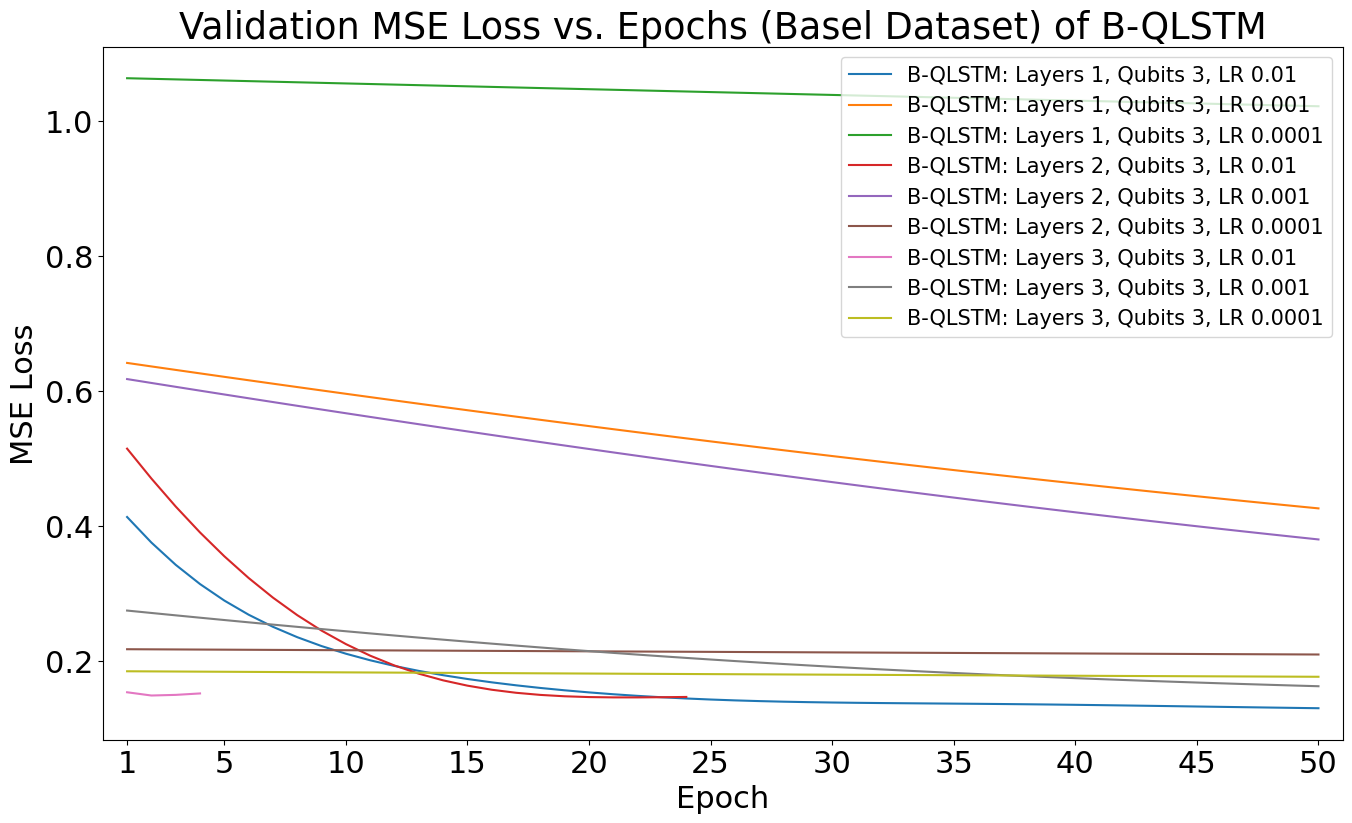

0.13056894000197838
0.13056894000197838
0.13056894000197838
0.06922314407505101
0.06922314407505101
0.06922314407505101
0.06922314407505101
0.06922314407505101
0.06922314407505101


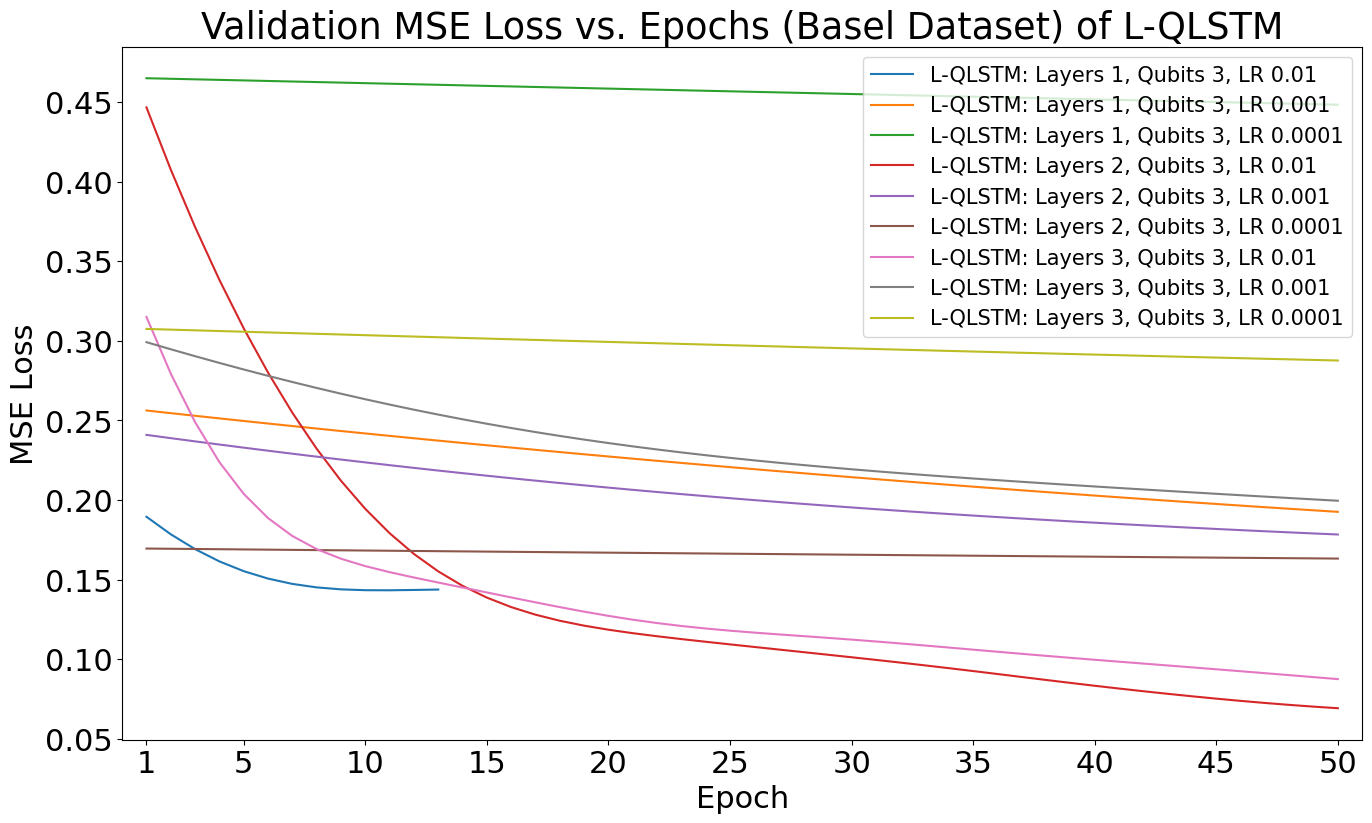

R-QLSTM
0.06922314407505101
R-QLSTM
0.06922314407505101
R-QLSTM
0.06922314407505101
R-QLSTM
0.04953035357794208
R-QLSTM
0.04953035357794208
R-QLSTM
0.04953035357794208
R-QLSTM
0.023225543431754602
R-QLSTM
0.023225543431754602
R-QLSTM
0.023225543431754602


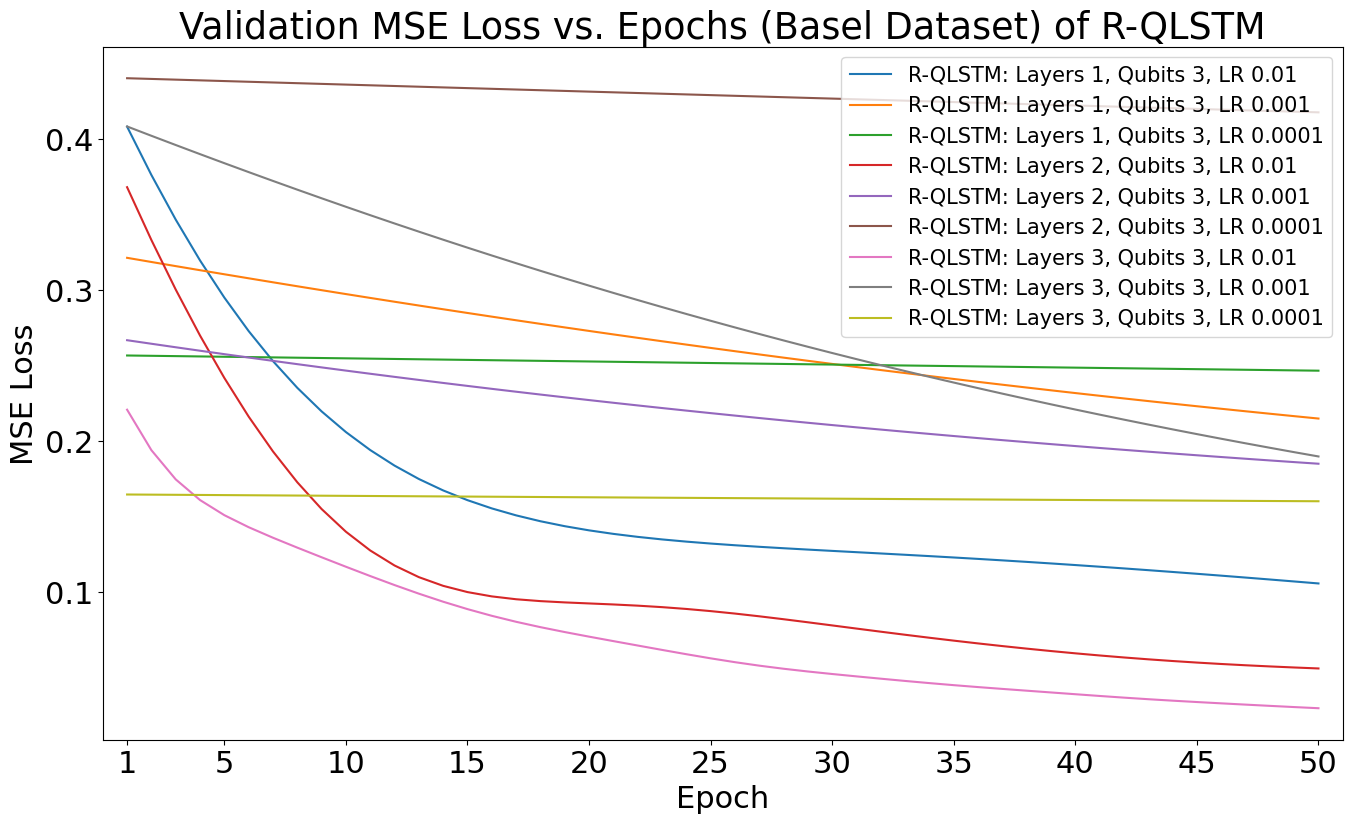

In [13]:

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# def parse_filename(filename):
#     # Example: qlstm.q8.lr0.005.vL-QLSTM.l3.pkl
#     parts = filename.split('.')
#     model = parts[0]
#     lr = None
#     layers = None
#     variant = None
#     for i, p in enumerate(parts):
#         if p.startswith('lr'):
#             lr = p[2:] + '.' + parts[i+1]
#         if p.startswith('l') and p[1:].isdigit():
#             layers = int(p[1:])
#         if p.startswith('v'):
#             variant = 'B-QLSTM' if p[0] == 'default' else p[0]
#     return model, variant, layers, lr
def parse_filename(filename):
    # Example: qlstm.q8.lr0.005.vL-QLSTM.l3.pkl
    parts = filename.split('_')
    lr = None
    layers = None
    variant = 'B-QLSTM' if parts[2] == 'qubits' else get_variant_name(parts[2])
    for i, p in enumerate(parts):
        if p.startswith('lr'):
            lr = float(parts[i+1])
        if p.startswith('layers'):
            layers = int(parts[i+1])
        if p.startswith('qubits'):
            qubits = int(parts[i+1])
    return variant, layers, lr, qubits

# Organize results by experiment, model, variant, layers, lr
results = {}
classical_dict = {}
for fname in filenames:
    file_path = os.path.join(root, fname)
    with open(file_path, 'rb') as file:
        model_dict = pickle.load(file)
    if 'classical' in fname:
        classical_dict[fname.split('.')[0].split('_')[-1]] = model_dict
        continue
    variant, layers, lr, qubits = parse_filename(fname)
    key = ('QLSTM', variant)
    if key not in results:
        results[key] = []
    val_loss, val_accuracy, best_loss = model_dict['loss'], model_dict['accuracy'], model_dict['best_loss']
    results[key].append({
        'layers': layers,
        'lr': lr,
        'val_loss': val_loss,
        'final_val_mse': best_loss,
        'qubits': qubits,
        'fname': fname
    })

# Example: Plotting for Sin Dataset (repeat for Basel if available)
# 1. Line plot of MSE loss vs. epochs for each model/variant
curr_length = 0
best_losses = []
for (model, variant), runs in results.items():
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        print(min(run['val_loss']))
        plt.plot(range(1,len(run['val_loss']) - curr_length + 1) ,run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Basel Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()
    break    



for (model, variant), runs in results.items():
    if variant != 'L-QLSTM':
        continue
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        print(min(run['val_loss']))
        plt.plot(range(1,len(run['val_loss']) - curr_length + 1) ,run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Basel Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()

for (model, variant), runs in results.items():
    if variant != 'R-QLSTM':
        continue
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        print(variant)
        print(min(run['val_loss']))
        plt.plot(range(1,len(run['val_loss']) - curr_length + 1) ,run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Basel Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()




In [14]:
# Load saved sin models
more_filenames = []

for root, dirs, files in os.walk('./more-testing'):
    for filename in files:
        if filename.endswith('.h5') and 'basel' in filename:
            more_filenames.append(filename)
            print(f"Loading {filename} ...")

more_results = {}    
for fname in more_filenames:
    file_path = os.path.join(root, fname)
    with open(file_path, 'rb') as file:
        model_dict = pickle.load(file)
    if 'classical' in fname:
        classical_dict[fname.split('.')[0].split('_')[-1]] = model_dict
        continue
    variant, layers, lr, qubits = parse_filename(fname)
    key = ('QLSTM', variant)
    if key not in more_results:
        more_results[key] = []
    val_loss, val_accuracy, best_loss = model_dict['loss'], model_dict['accuracy'], model_dict['best_loss']
    more_results[key].append({
        'layers': layers,
        'lr': lr,
        'val_loss': val_loss,
        'final_val_mse': best_loss,
        'qubits': qubits,
        'fname': fname
    })

Loading model_qlstm_qubits_4_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_qubits_5_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_qubits_6_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_reupload_qubits_4_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_reupload_qubits_5_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_reupload_qubits_6_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_v2_qubits_4_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_v2_qubits_5_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_v2_qubits_6_layers_1_lr_0.01_basel.h5 ...


0.14938203034912614
0.1465783441687135
1.0214578886048025
0.4263234717680312
0.13056894000197838
{'layers': 1, 'lr': 0.01, 'val_loss': [0.41358079663592023, 0.3757341603698788, 0.3427747475180965, 0.31431846625951926, 0.28988273368418727, 0.2689519492031726, 0.2510337467293762, 0.23568782025528903, 0.22253124407698427, 0.21123297146030506, 0.20150593974387604, 0.19310071738279647, 0.18580187272108564, 0.1794264554409864, 0.17382307454656526, 0.16887023870359386, 0.16447337639970716, 0.16056069553375898, 0.15707849560800213, 0.15398650925034327, 0.15125375062097338, 0.14885506389772712, 0.14676841419946643, 0.14497287741604056, 0.14344721790923684, 0.14216896987317912, 0.1411139164894221, 0.14025595082080153, 0.13956722458809095, 0.13901860512512798, 0.1385803664190975, 0.13822308597364213, 0.13791867854611145, 0.13764146126142549, 0.1373691388793304, 0.13708361351620338, 0.1367715022628187, 0.13642430961250565, 0.1360382432248897, 0.13561370134246276, 0.1351544785432754, 0.134666821256

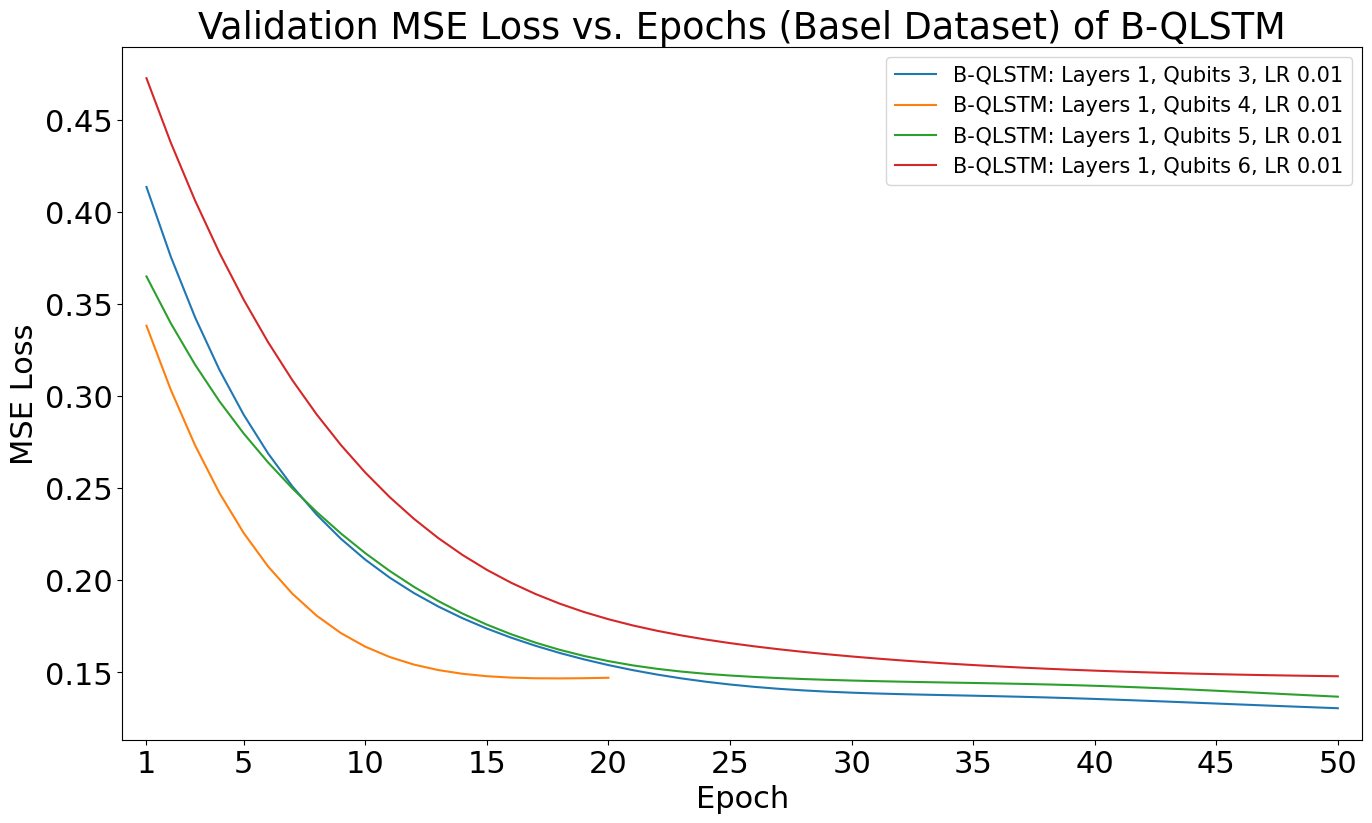

0.14331294953215454
0.4483273846757527
0.1925795085182203
0.16323017207283247
0.17834427152037022
0.06922314407505101
0.287643674922493
0.19954716017925622
0.08751606609827146
0.08109589941724443
0.08109589941724443
0.08109589941724443


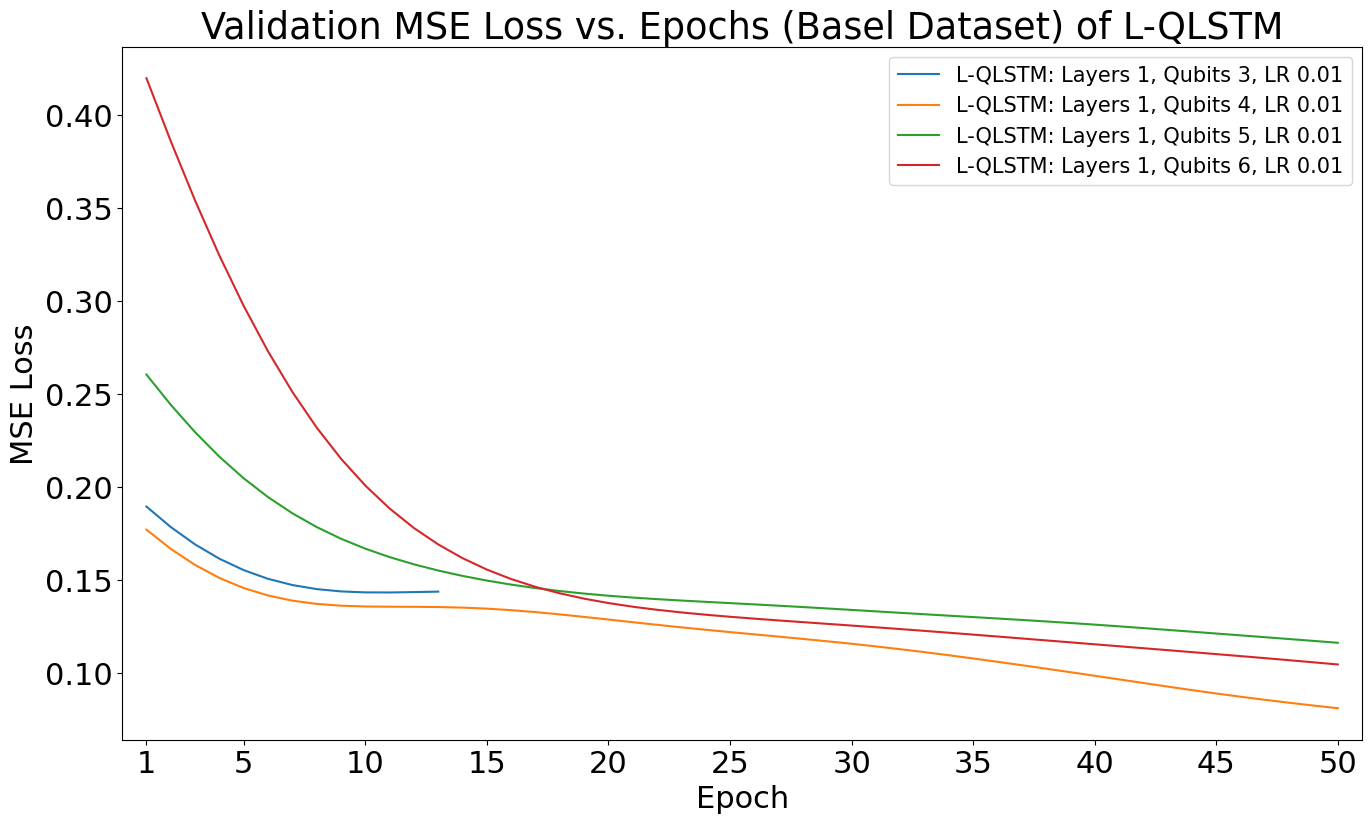

0.10575857869324612
0.05863623025626951
0.14666236476441405
0.1075912680735803


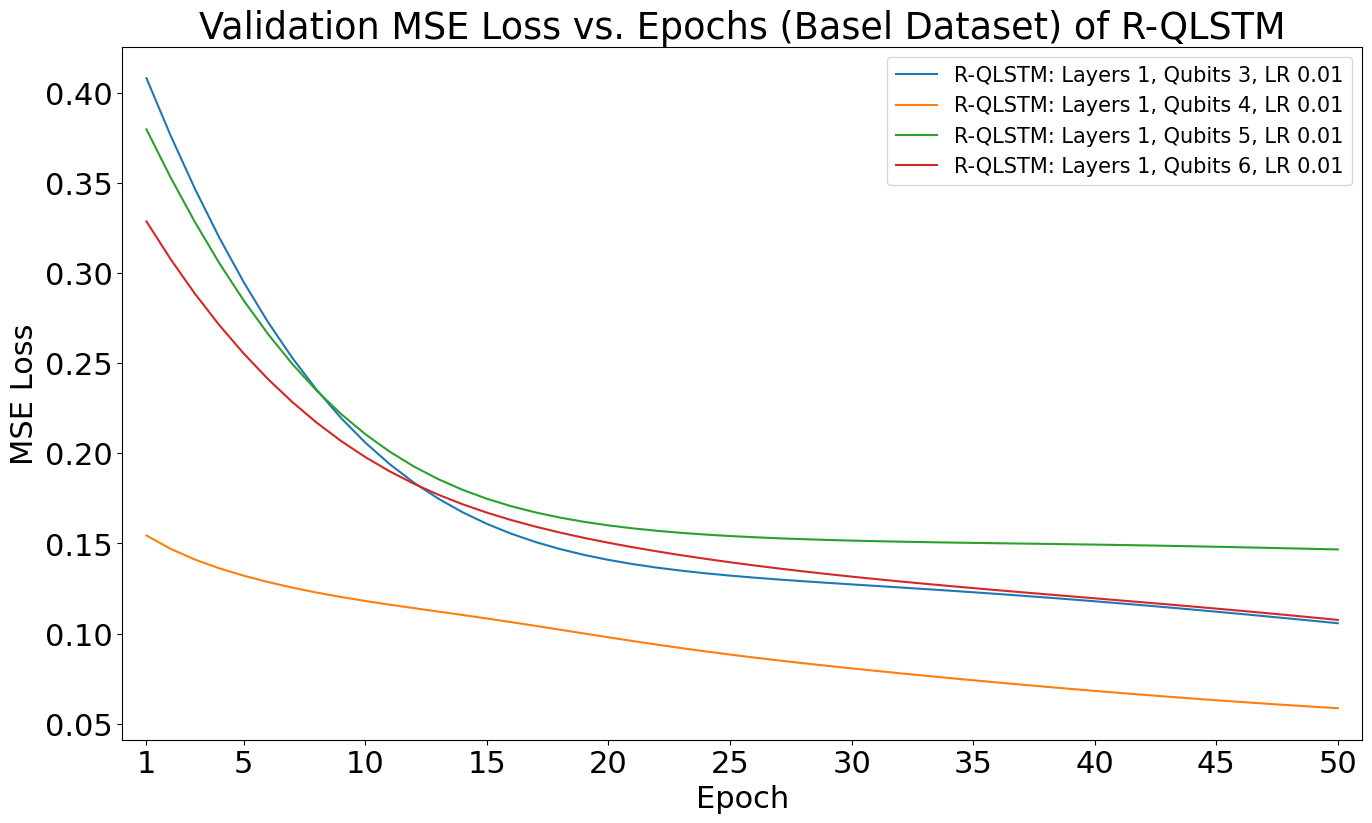

dict_keys(['basel'])


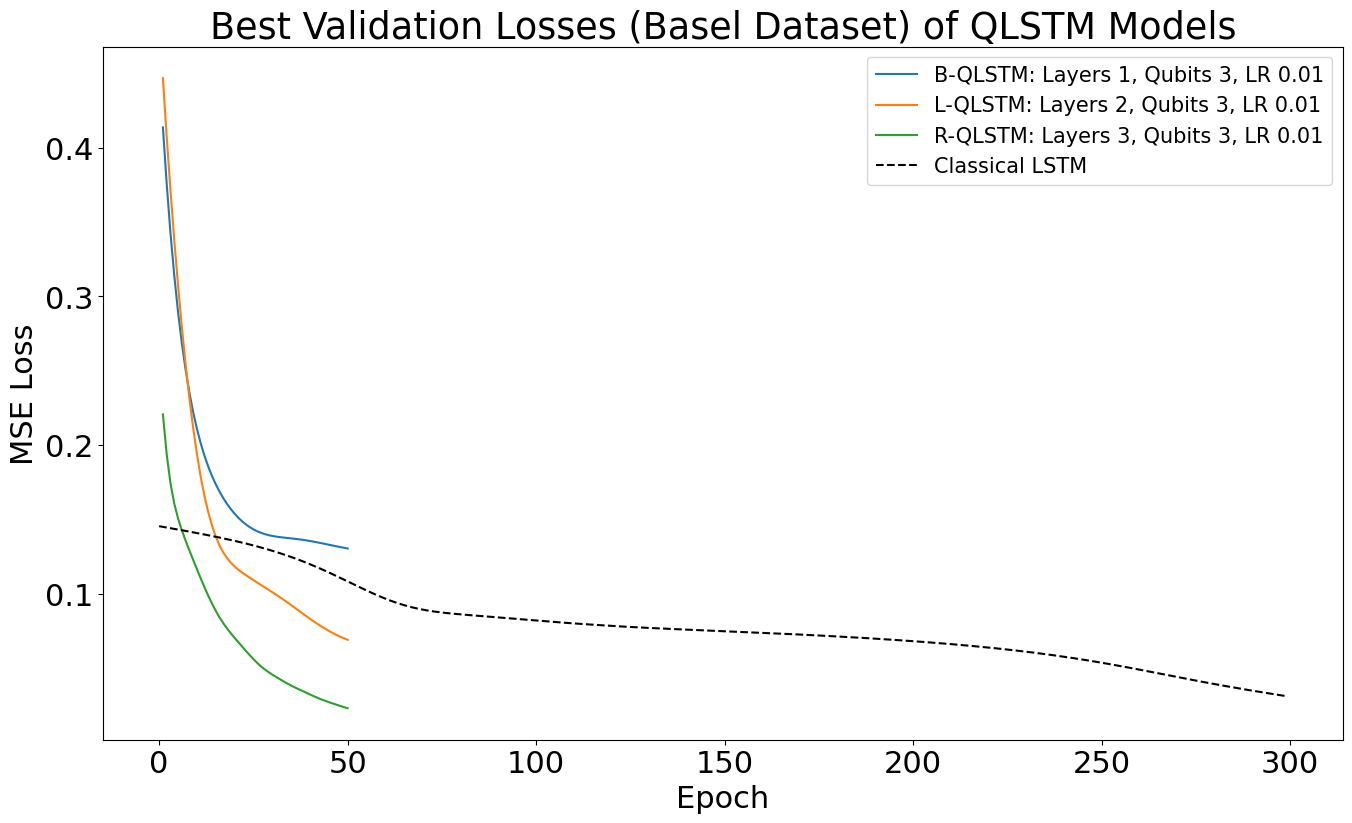

Best Loss for B-QLSTM: 0.13056894000197838
Best Loss for L-QLSTM: 0.06922314407505101
Best Loss for R-QLSTM: 0.023225543431754602
Best Loss for LSTM: 0.03133327219193799


In [15]:
curr_length = 0
for (model, variant), runs in results.items():
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        print(min(run['val_loss']))
        if run['lr'] == 0.01 and run['layers'] == 1:
            print(run)
            plt.plot(range(1,len(run['val_loss']) + 1) , run['val_loss'], label=f"{label}")
    break    

more_curr_length = 0
for (model, variant), runs in more_results.items():    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        print(min(run['val_loss']))
        if run['lr'] == 0.01 and run['layers'] == 1:
            plt.plot(range(1,len(run['val_loss']) - more_curr_length + 1) , run['val_loss'][more_curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][more_curr_length:len(run['val_loss'])]
        more_curr_length = next_length
    plt.title(f"Validation MSE Loss vs. Epochs (Basel Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()
    break    



for (model, variant), runs in results.items():
    if variant != 'L-QLSTM':
        continue
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        print(min(run['val_loss']))
        if run['lr'] == 0.01 and run['layers'] == 1:
            plt.plot(range(1,len(run['val_loss']) + 1) ,run['val_loss'], label=f"{label}")

for (model, variant), runs in more_results.items():   
    if variant != 'L-QLSTM':
        continue 
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        print(min(run['val_loss']))
        if run['lr'] == 0.01 and run['layers'] == 1:
            plt.plot(range(1,len(run['val_loss']) - more_curr_length + 1) , run['val_loss'][more_curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][more_curr_length:len(run['val_loss'])]
        more_curr_length = next_length
    plt.title(f"Validation MSE Loss vs. Epochs (Basel Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()  


for (model, variant), runs in results.items():
    if variant != 'R-QLSTM':
        continue
    plt.figure(figsize=(16, 9))

    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        
        if run['lr'] == 0.01 and run['layers'] == 1:
            print(min(run['val_loss']))
            plt.plot(range(1,len(run['val_loss']) + 1) ,run['val_loss'], label=f"{label}")

for (model, variant), runs in more_results.items():   
    if variant != 'R-QLSTM':
        continue 
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
        
        if run['lr'] == 0.01 and run['layers'] == 1:
            print(min(run['val_loss'][more_curr_length:len(run['val_loss'])]))
            plt.plot(range(1,len(run['val_loss']) - more_curr_length + 1) , run['val_loss'][more_curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][more_curr_length:len(run['val_loss'])]
        more_curr_length = next_length
    plt.title(f"Validation MSE Loss vs. Epochs (Basel Dataset) of {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()  
    
plt.figure(figsize=(16, 9))
for model, variant, run in best_losses:
    label = f"{variant}: Layers {run['layers']}, Qubits {run['qubits']}, LR {run['lr']}"
    plt.plot(range(1,len(run['val_loss'])+1), run['val_loss'], label=label)
print(classical_dict.keys())
plt.plot(classical_dict['basel']['loss'], label='Classical LSTM', linestyle='--', color='black')
plt.title(f"Best Validation Losses (Basel Dataset) of QLSTM Models")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(fontsize=legend_font_size)
plt.show()

for model, variant, run in best_losses:
    print(f"Best Loss for {variant}: {min(run['val_loss'])}")
print(f"Best Loss for LSTM: {min(classical_dict['basel']['loss'])}")